In [20]:
import numpy as np
import matplotlib.pyplot as plt


Method: standard
Weights: [1. 1. 1. 1.]
Bias: 3.9999999999999836

Method: single_shuffle
Weights: [1. 1. 1. 1.]
Bias: 3.999999999999965

Method: random_reshuffle
Weights: [1. 1. 1. 1.]
Bias: 3.9999999999999734


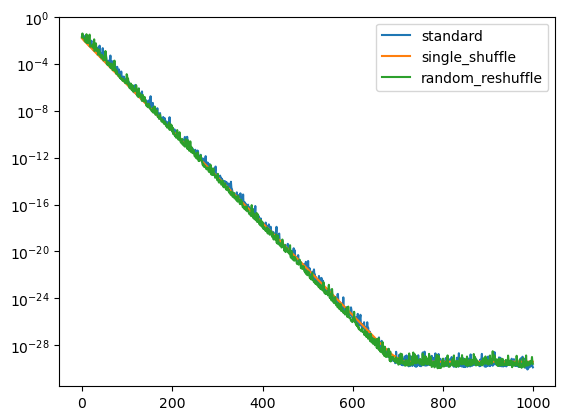

In [60]:
# Define the linear regression model
def linear_regression(X, w, b):
    return np.dot(X, w) + b

# Define the loss function (Mean Squared Error)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Define the gradient of the loss function with respect to w and b
def compute_gradients(X, y, y_pred):
    m = len(y)
    dw = -2/m * np.dot(X.T, (y - y_pred))
    db = -2/m * np.sum(y - y_pred)
    
    return dw, db

# Define the SGD function with various options
def sgd(X, y, learning_rate=0.01, epochs=100, method='standard'):
    m, n = X.shape
    
    mse_list = []
    
    w = np.zeros(n)
    b = 0

    # Single shuffle before training
    if method == 'single_shuffle':
        permutation = np.random.permutation(m)
        X = X[permutation]
        y = y[permutation]

    for epoch in range(epochs):

        if method == 'random_reshuffle':
            # Shuffle the data at the beginning of each epoch
            permutation = np.random.permutation(m)
            X = X[permutation]
            y = y[permutation]
        
        
            

        for i in range(m):
            
            if method == 'standard':
                # Shuffle data every step such that all data points are equally likely to be selected each step
                permutation = np.random.permutation(m)
                X = X[permutation]
                y = y[permutation]
            
            Xi = X[i:i+1]
            yi = y[i:i+1]
            y_pred = linear_regression(Xi, w, b)

            # Compute gradients
            dw, db = compute_gradients(Xi, yi, y_pred)
            dw = dw.ravel()  # Flatten dw to match the shape of w

            # Update parameters
            w -= learning_rate * dw
            b -= learning_rate * db

            #if method == 'incremental': # not nessecary
             #   # Shuffle the remaining data after each update
             #   remaining_indices = list(range(i+1, m))
             #   if remaining_indices:
             #       remaining_permutation = np.random.permutation(remaining_indices)
             #       X[i+1:m] = X[remaining_permutation]
             #       y[i+1:m] = y[remaining_permutation]
        y_pred = linear_regression(X, w,b)
        mse_list.append(mean_squared_error(y, y_pred))
            
    return w, b, mse_list



# Example usage
if __name__ == "__main__":
    # Generate some example data
    np.random.seed(0)
    
    n = 100
    m =4
    X = 1+ np.random.normal(0,1/10, (n, m))
    y = 4 + np.inner(np.ones(m),  X) #+ np.random.randn(100, 1)
    
    # Fit the model using different SGD methods
    methods = ['standard', 'single_shuffle', 'random_reshuffle']#, 'incremental']
    for method in methods:
        print(f"\nMethod: {method}")
        w, b, mse = sgd(X, y, learning_rate=0.1, epochs=1000, method=method)
        print("Weights:", w)
        print("Bias:", b)
        
        plt.plot(mse, label = method)
    plt.legend()
    plt.yscale('log')
    


Method: standard
Weights: [1. 1. 1. 1.]
Bias: 3.999999999999998

Method: single_shuffle
Weights: [1. 1. 1. 1.]
Bias: 3.999999999999994

Method: random_reshuffle
Weights: [1. 1. 1. 1.]
Bias: 4.000000000000015


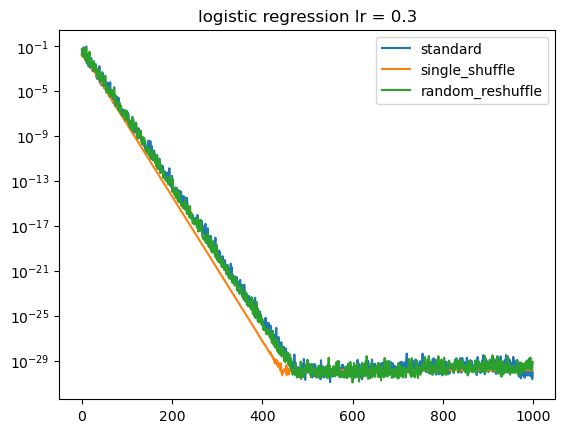


Method: standard
Weights: [1. 1. 1. 1.]
Bias: 3.99999999999998

Method: single_shuffle
Weights: [1. 1. 1. 1.]
Bias: 3.9999999999999556

Method: random_reshuffle
Weights: [1. 1. 1. 1.]
Bias: 3.9999999999999813


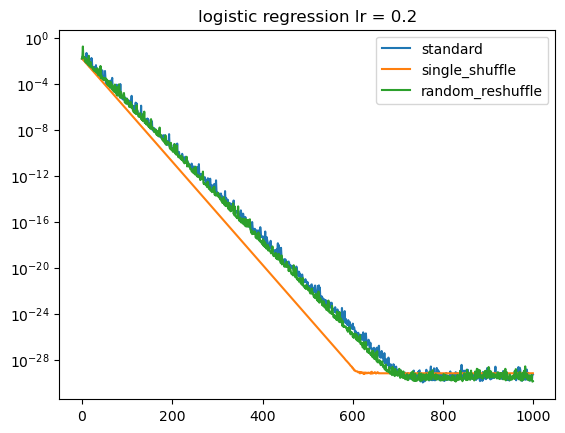


Method: standard
Weights: [1. 1. 1. 1.]
Bias: 3.9999999997222706

Method: single_shuffle
Weights: [1. 1. 1. 1.]
Bias: 3.9999999999563878

Method: random_reshuffle
Weights: [1. 1. 1. 1.]
Bias: 3.9999999997947424


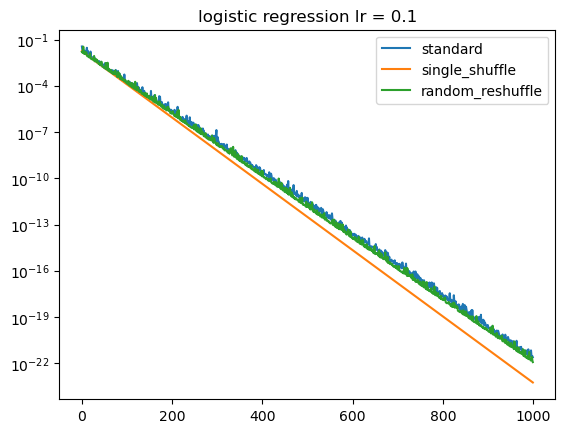


Method: standard
Weights: [1.04963628 1.06167131 1.06113925 1.06752703]
Bias: 3.759922388162117

Method: single_shuffle
Weights: [1.05171995 1.05709963 1.06277698 1.06491783]
Bias: 3.76453918176441

Method: random_reshuffle
Weights: [1.04920669 1.06108345 1.06305586 1.06748759]
Bias: 3.760571270959159


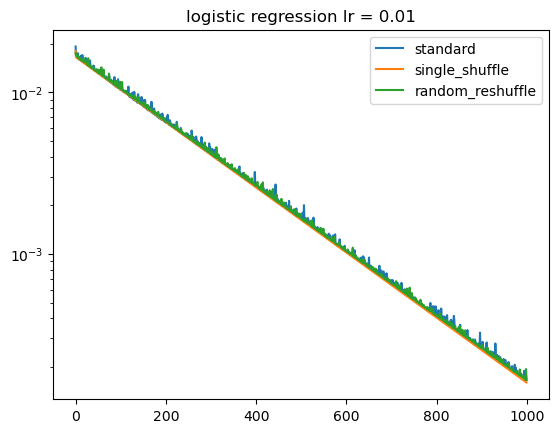

In [66]:
# Define the logistic regression model
def logistic_regression(X, w, b):
    linear_output = np.dot(X, w) + b
    return 1 / (1 + np.exp(-linear_output))

# Define the loss function (Binary Cross-Entropy Loss)
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Define the gradient of the loss function with respect to w and b
def compute_gradients(X, y, y_pred):
    m = len(y)
    dw = np.dot(X.T, (y_pred - y)) / m
    db = np.sum(y_pred - y) / m
    return dw, db

# Define the SGD function with various options
def sgd(X, y, learning_rate=0.01, epochs=100, method='standard'):
    m, n = X.shape
    
    mse_list = []
    
    w = np.zeros(n)
    b = 0

    # Single shuffle before training
    if method == 'single_shuffle':
        permutation = np.random.permutation(m)
        X = X[permutation]
        y = y[permutation]

    for epoch in range(epochs):

        if method == 'random_reshuffle':
            # Shuffle the data at the beginning of each epoch
            permutation = np.random.permutation(m)
            X = X[permutation]
            y = y[permutation]
        
        
            

        for i in range(m):
            
            if method == 'standard':
                # Shuffle data every step such that all data points are equally likely to be selected each step
                permutation = np.random.permutation(m)
                X = X[permutation]
                y = y[permutation]
            
            Xi = X[i:i+1]
            yi = y[i:i+1]
            y_pred = linear_regression(Xi, w, b)

            # Compute gradients
            dw, db = compute_gradients(Xi, yi, y_pred)
            dw = dw.ravel()  # Flatten dw to match the shape of w

            # Update parameters
            w -= learning_rate * dw
            b -= learning_rate * db

            #if method == 'incremental': # not nessecary
             #   # Shuffle the remaining data after each update
             #   remaining_indices = list(range(i+1, m))
             #   if remaining_indices:
             #       remaining_permutation = np.random.permutation(remaining_indices)
             #       X[i+1:m] = X[remaining_permutation]
             #       y[i+1:m] = y[remaining_permutation]
        y_pred = linear_regression(X, w,b)
        mse_list.append(mean_squared_error(y, y_pred))
            
    return w, b, mse_list



# Example usage
if __name__ == "__main__":
    # Generate some example data
    np.random.seed(0)
    
    n = 100
    m =4
    X = 1+ np.random.normal(0,1/10, (n, m))
    y = 4 + np.inner(np.ones(m),  X) #+ np.random.randn(100, 1)
    learning = [0.3,0.2,0.1,0.01]
    # Fit the model using different SGD methods
    methods = ['standard', 'single_shuffle', 'random_reshuffle']#, 'incremental']
    for lrs in learning:
        for method in methods:
            print(f"\nMethod: {method}")
            w, b, mse = sgd(X, y, learning_rate=lrs, epochs=1000, method=method)
            print("Weights:", w)
            print("Bias:", b)
            
            plt.plot(mse, label = method)
        plt.title(f'logistic regression lr = {lrs}')
        plt.legend()
        plt.yscale('log')
        plt.show()
        plt.close()
